In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import yellowbrick

In [2]:
data = pd.read_csv('mobile_ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for d in ['Gender']: data[d] = label_encoder.fit_transform(data[d])
    
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [4]:
x = data[['Age','EstimatedSalary','Gender']].values
y = data['Purchased'].values

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 3)
(320,)
(80, 3)
(80,)


In [6]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import metrics

In [8]:
rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 0)
rf.fit(x_train, np.ravel(y_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [9]:
y_pred = rf.predict(x_test)

In [10]:
print("Accuracy rf:",metrics.accuracy_score(y_test, y_pred))

Accuracy rf: 0.9375


In [11]:
knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')

In [12]:
y_pred = knn.predict(x_test)

In [13]:
print("Accuracy knn:",metrics.accuracy_score(y_test, y_pred))

Accuracy knn: 0.925


In [14]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = lr.predict(x_test)

In [16]:
print("Accuracy lr:",metrics.accuracy_score(y_test, y_pred))

Accuracy lr: 0.9125


In [17]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
y_pred = gnb.predict(x_test)

In [19]:
print("Accuracy gnb:",metrics.accuracy_score(y_test, y_pred))

Accuracy gnb: 0.925


In [20]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
y_pred = svc.predict(x_test)

In [22]:
print("Accuracy svc:",metrics.accuracy_score(y_test, y_pred))

Accuracy svc: 0.9125


In [23]:
from sklearn import ensemble, linear_model, neighbors, svm, naive_bayes

ALG = [
    ensemble.RandomForestClassifier(),
    neighbors.KNeighborsClassifier(),
    linear_model.LogisticRegression(),
    naive_bayes.GaussianNB(),
    svm.SVC()
]

In [24]:
from sklearn.metrics import mean_squared_error, confusion_matrix, precision_score, roc_curve, accuracy_score

ALG_columns = []
ALG_compare = pd.DataFrame(columns = ALG_columns)


row_index = 0
for alg in ALG:
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    ALG_name = alg.__class__.__name__
    ALG_compare.loc[row_index,'ALG Name'] = ALG_name
    ALG_compare.loc[row_index, 'ALG Train Accuracy'] = alg.score(x_train, y_train)
    ALG_compare.loc[row_index, 'ALG Test Accuracy'] = alg.score(x_test, y_test)
    ALG_compare.loc[row_index, 'ALG Precision'] = precision_score(y_test, predicted)

    row_index+=1


ALG_compare.sort_values(by = ['ALG Test Accuracy'], ascending = False, inplace = True)    
ALG_compare

,ALG Name,ALG Train Accuracy,ALG Test Accuracy,ALG Precision
1,KNeighborsClassifier,0.909375,0.9500,0.875000
4,SVC,0.896875,0.9500,0.875000
0,RandomForestClassifier,1.000000,0.9375,0.840000
3,GaussianNB,0.881250,0.9250,0.900000
2,LogisticRegression,0.825000,0.9125,0.894737


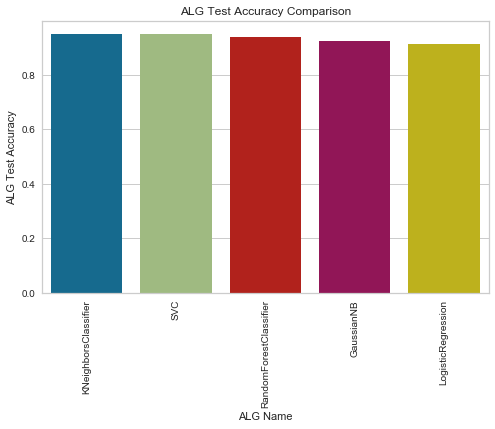

In [25]:
plt.subplots(figsize=(8,5))
sns.barplot(x="ALG Name", y="ALG Test Accuracy", data=ALG_compare)
plt.xticks(rotation=90)
plt.title('ALG Test Accuracy Comparison')
plt.show()